In [ ]:
import zipfile
from google.colab import files
import os
from io import BytesIO  # Add this line to import BytesIO

# Upload the zip file using Colab's file upload functionality
uploaded = files.upload()

# Specify the name of the uploaded file
uploaded_file_name = next(iter(uploaded))

# Specify the extraction path
extraction_path = '/content/Dataset'

# Create the extraction path if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

try:
    # Open the zip file and extract its contents
    with zipfile.ZipFile(BytesIO(uploaded[uploaded_file_name]), 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print("Extraction successful.")
except Exception as e:
    print(f"Error during extraction: {e}")




Saving archive.zip to archive.zip
Extraction successful.


In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
classes_names = {
    1 : "30 hiz limit",
    3 : "50 hiz limit",
    4 : "Yaya gecidi",
    11 : "DUR",
    13 : "Yasak",
    34 : "Sag",
    35 : "Sol",
    36 : "Ust",
    37 : "Sag_Ust",
    38 : "Sol_Ust",
    39 : "Sag_Sol",
    40 : "ileri_sag",
    41 : "ileri_sol",
    42 : "Sag_alt",
    43 : "Sol_alt",
    44 : "Kavsak",
    80 : "Durak",
    83 : "Park",
    88 : "Sol_donus",

}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, num_images):
    """
    Display a grid of images.

    Parameters:
    - images: list of numpy arrays with shape (height, width) for single grayscale images
              or shape (height, width, channels) for RGB images
    - num_images: number of images to display
    """

    if isinstance(images[0], np.ndarray):
        is_grayscale = len(images[0].shape) == 2
        grid_size = int(np.ceil(np.sqrt(num_images)))

        fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))

        if grid_size == 1:
            axes = np.array([axes])

        for i in range(num_images):
            ax = axes[i // grid_size, i % grid_size] if num_images > 1 else axes[i]
            if is_grayscale:
                ax.imshow(images[i], cmap='gray')
            else:
                ax.imshow(images[i])
            ax.set_title("Sinif: " + classes_names[(y_small_test_images[i])])  # Add title with image number
            ax.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Input is not a list of numpy arrays.")

def show_images_with_predicted_values(images, num_images, predicted_classes):
    """
    Display a grid of images.

    Parameters:
    - images: list of numpy arrays with shape (height, width) for single grayscale images
              or shape (height, width, channels) for RGB images
    - num_images: number of images to display
    """

    if isinstance(images[0], np.ndarray):
        is_grayscale = len(images[0].shape) == 2
        grid_size = int(np.ceil(np.sqrt(num_images)))

        fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))

        if grid_size == 1:
            axes = np.array([axes])

        for i in range(num_images):
            ax = axes[i // grid_size, i % grid_size] if num_images > 1 else axes[i]
            if is_grayscale:
                ax.imshow(images[i], cmap='gray')
            else:
                ax.imshow(images[i])
            ax.set_title("Sinif: " + classes_names[(y_small_test_images[i])] + "\nTahmin : " + classes_names[(int(predicted_classes[i]))])  # Add title with image number
            ax.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Input is not a list of numpy arrays.")

# Example usage:
# Assuming 'test_images_2D' is a list of numpy arrays with shape (height, width)
# and 'num_images' is the number of images to display
# show_images(test_images_2D, num_images)

In [ ]:
# Dosya klasöründeki her dosya için
path = "/content/Dataset/archive/Trafik/Test"
files = os.listdir(path)
images_3D_test = []
images_2D_test = []

for file in files:
    # Dosyanın tam yolu
    file_path = os.path.join(path + '/' +  file)
    # Dosyanın bir fotoğraf olup olmadığını kontrol eder
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png") or file.endswith(".PNG"):
        # Fotoğrafı açar
        with Image.open(file_path) as img:
            # Fotoğrafı görüntüler
            img = cv2.imread(file_path, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(img, (32,32))
            images_3D_test.append(resized_image)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(img, (32,32))
            images_2D_test.append(resized_image)
    else:
        print(f"{file} bir fotoğraf değil.")


In [ ]:
y_small_test_images = [43, 83, 34, 36, 40, 35, 1, 41, 80, 83, 37, 88, 11, 4, 3, 44, 80, 42, 39, 11, 38, 88, 44, 1, 13]

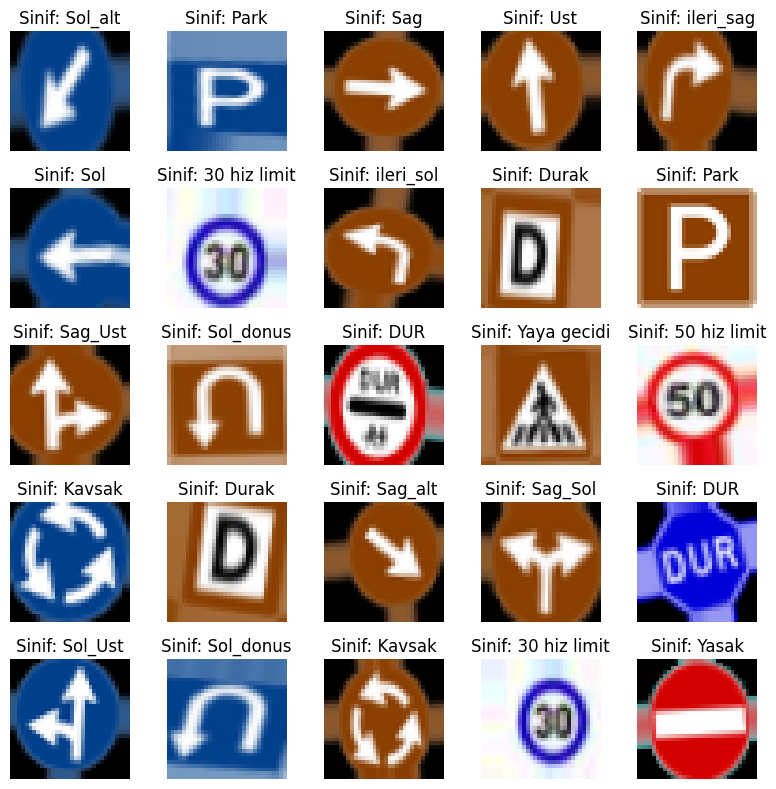

In [ ]:
show_images(images_3D_test, 25)

In [ ]:
import os
from PIL import Image
import cv2

# Dosya yolu
datasetPath = "/content/Dataset/archive/Trafik/Trafik/"


# List the files and folders in the datasetPath
klasorler = os.listdir(datasetPath)

# Filter out non-integer folder names
klasorler = [x for x in klasorler if x.isdigit()]

# Convert folder names to integers
klasorler = [int(x) for x in klasorler]

# Sort the integer folder names
klasorler = sorted(klasorler)

# Convert back to string if needed
klasorler = [str(x) for x in klasorler]

print(klasorler)

['1', '3', '4', '11', '13', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '80', '83', '88']


In [ ]:


#images_3D = []
images_2D = []
#images_3D_tmp = []
images_2D_tmp = []
labels = []


print(klasorler)


for klasor in klasorler:
    # Dosya klasöründeki her dosya için
    dosyalar = os.listdir(datasetPath+'/'+klasor)
    print(dosyalar)
    images_3D_tmp = []
    images_2D_tmp = []
    labels.append(int(klasor))
    for dosya in dosyalar:
        # Dosyanın tam yolu
        dosya_yolu = os.path.join(datasetPath + klasor + '/' +  dosya)
        # Dosyanın bir fotoğraf olup olmadığını kontrol eder
        if dosya.endswith(".jpg") or dosya.endswith(".jpeg") or dosya.endswith(".png") or dosya.endswith(".PNG"):
            # Fotoğrafı açar
            with Image.open(dosya_yolu) as img:
                # Fotoğrafı görüntüler
                #img = cv2.imread(dosya_yolu, cv2.COLOR_BGR2RGB)
                #resized_image = cv2.resize(img, (200,200))
                #images_3D_tmp.append(resized_image)
                img = cv2.imread(dosya_yolu, cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(img, (32,32))
                images_2D_tmp.append(img)
        else:
            print(f"{dosya} bir fotoğraf değil.")
    #images_3D.append(images_3D_tmp)
    images_2D.append(images_2D_tmp)


['1', '3', '4', '11', '13', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '80', '83', '88']
['aug_0_9282.png', 'aug_0_7897.png', 'aug_0_6199.png', 'aug_0_3873.png', 'aug_0_1268.png', 'aug_0_8158.png', 'aug_0_5742.png', 'aug_0_5297.png', 'aug_0_8984.png', 'aug_0_7036.png', 'aug_0_4601.png', 'aug_0_5072.png', 'aug_0_3012.png', 'aug_0_6757.png', 'aug_0_1906.png', 'aug_0_304.png', 'aug_0_4068.png', 'aug_0_3814.png', 'aug_0_8936.png', 'aug_0_9394.png', 'aug_0_6840.png', 'aug_0_7898.png', 'aug_0_3558.png', 'aug_0_4099.png', 'aug_0_4345.png', 'aug_0_7264.png', 'aug_0_4225.png', 'aug_0_5821.png', 'aug_0_4403.png', 'aug_0_5863.png', 'aug_0_2005.png', 'aug_0_9463.png', 'aug_0_5417.png', 'aug_0_3070.png', 'aug_0_7759.png', 'aug_0_784.png', 'aug_0_4758.png', 'aug_0_8293.png', 'aug_0_5351.png', 'aug_0_1487.png', 'aug_0_2417.png', 'aug_0_693.png', 'aug_0_577.png', 'aug_0_5448.png', 'aug_0_1535.png', 'aug_0_1100.png', 'aug_0_2909.png', 'aug_0_8303.png', 'aug_0_804.png', 'aug_0_450

In [ ]:
inputBasePath    = r"/content/Dataset/archive/Trafik/Trafik"
outputBasePath =  r"/content/Dataset/archive/Trafik/DatasetArray" #bu klasörlerin daha önce oluşturulmuş olması gerek
image_width = 32
image_height = 32
classes = []

# List the files and folders in the datasetPath
klasorler = os.listdir(datasetPath)

# Filter out non-integer folder names
klasorler = [x for x in klasorler if x.isdigit()]

# Convert folder names to integers
klasorler = [int(x) for x in klasorler]

# Sort the integer folder names
klasorler = sorted(klasorler)

# Convert back to string if needed
klasorler = [str(x) for x in klasorler]

print(klasorler)


['1', '3', '4', '11', '13', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '80', '83', '88']


In [ ]:
classes = klasorler

In [ ]:
"""
Bu kodda veri setinden ilgili katergorileri bütün fotoğraflarını okunup numpy dizisine atanıyor ve bir dosyda kaydediliyor. Sonradan farklı model
  denenmek istediğinde fotoğrafları baştan okumamamk için. iki tane npy dosyası oluşturuluyor biri "images" girdi olarak çıktı olarak da ilgili
  fotoğrafın ait olduğu kategori o da "labels" dosyasında kaydediliyor.

"""
os.chdir(inputBasePath)

X = []
Y = []

for class1 in classes:
    os.chdir(class1)
    print('=> ' + class1)

    for file in os.listdir('./'):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"{file} adlı resim okunamadı.")
            continue

        img = cv2.resize(img, (image_width, image_height))
        #img = vgg16.preprocess_input(img)
        X.append(img)
        Y.append(class1)

    os.chdir('..')

X = np.array(X).reshape(-1, image_width, image_height)
Y = np.array(Y)

os.chdir('..')
os.makedirs("DatasetArray", exist_ok=True)
os.chdir("DatasetArray")

np.save(f"{image_width}x{image_height}_images", X)
np.save(f"{image_width}x{image_height}_labels", Y)

print("[BİLGİ - AŞAMA 1] NUMPY DİZİSİ OLUŞTURMA TAMAMLANDI\n")

=> 1
=> 3
=> 4
=> 11
=> 13
=> 34
=> 35
=> 36
=> 37
=> 38
=> 39
=> 40
=> 41
=> 42
=> 43
=> 44
=> 80
=> 83
=> 88
[BİLGİ - AŞAMA 1] NUMPY DİZİSİ OLUŞTURMA TAMAMLANDI



In [ ]:
from skimage.filters import prewitt_h,prewitt_v
import time



def extracting_edges(image):

    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(image)
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(image)

    return edges_prewitt_vertical,edges_prewitt_horizontal

In [ ]:
horizontal_images = []
vertical_images = []
horizontal_images_tmp = []
vertical_images_tmp = []

for img in X:
    pv, ph = extracting_edges(img)
    horizontal_images.append(ph)
    vertical_images.append(pv)



In [ ]:
X = np.array(vertical_images)

In [ ]:
X /= 255

In [ ]:
import numpy as np

def unflatten(data, size, image_width, image_height):
    result = []

    for k in range(size):
        temp_img = []
        for i in range(image_height):
            temp_row = data[k, i * image_width:(i + 1) * image_width]
            temp_img.append(temp_row)
        result.append(temp_img)

    return np.array(result)




In [ ]:
def flatten(data):
  flattend = []
  for img in data:
    image = []
    for i in img:
        for j in i:
            image.append(j)
    image = np.array(image)
    flattend.append(image)

  flattend = np.array(flattend)
  return flattend


In [ ]:
X.shape

(4298, 32, 32)

In [ ]:
X_train = flatten(X)


In [ ]:
y_train = Y


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    Y,
    test_size=0.20,
    random_state=42
)

In [ ]:
X_train.shape

(3438, 1024)

In [ ]:
X_test.shape

(860, 1024)

In [ ]:
y_test = np.array(y_test)

In [ ]:
y_test.shape

(860,)

In [ ]:
y_train.shape

(3438,)


# **The Models with extracting the features**



In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8081395348837209

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6744186046511628

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7395348837209302

In [ ]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [ ]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8732558139534884

In [ ]:
mlpc_model = MLPClassifier().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5046511627906977

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8406976744186047

In [ ]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.5104651162790698

In [ ]:

# Assuming you have defined X_test and y_test somewhere in your code
modeller = [knn_model, mlpc_model, cart_model, rf_model, gbm_model, catb_model, lgbm_model]

# Initialize an empty list to store the results
results = []

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    results.append([isimler, dogruluk * 100])

# Convert the list of results to a pandas DataFrame
results_pd = pd.DataFrame(results, columns=["Modeller", "Accuracy"])

results_pd

,Modeller,Accuracy
0,KNeighborsClassifier,67.441860
1,MLPClassifier,50.465116
2,DecisionTreeClassifier,51.046512
3,RandomForestClassifier,80.813953
4,GradientBoostingClassifier,73.953488
5,CatBoostClassifier,87.325581
6,LGBMClassifier,84.069767


Text(0.5, 1.0, 'The accuracy of the models with Feature Extraction')

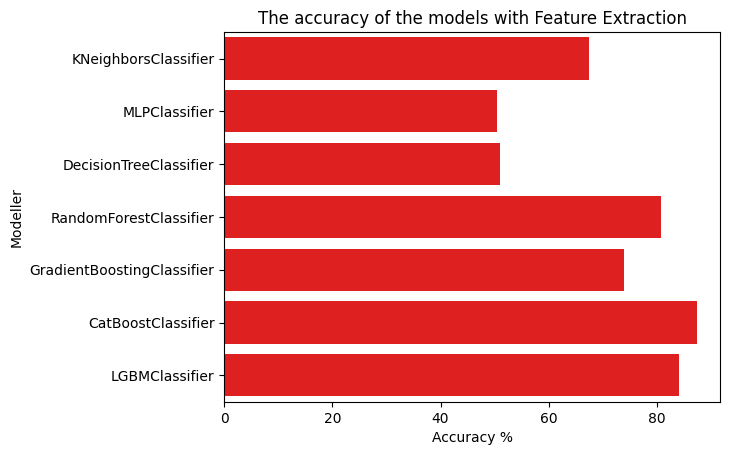

In [ ]:
sns.barplot(x="Accuracy", y= "Modeller", data=results_pd, color="r")
plt.xlabel("Accuracy %")
plt.title("The accuracy of the models with Feature Extraction")

In [ ]:
vertical_images_test = []
horizontal_images_test = []
for img in images_2D_test:
    pv, ph = extracting_edges(img)
    horizontal_images_test.append(ph)
    vertical_images_test.append(pv)

In [ ]:
y_tt = [str(i) for i in y_small_test_images]
y_tt

['43',
 '83',
 '34',
 '36',
 '40',
 '35',
 '1',
 '41',
 '80',
 '83',
 '37',
 '88',
 '11',
 '4',
 '3',
 '44',
 '80',
 '42',
 '39',
 '11',
 '38',
 '88',
 '44',
 '1',
 '13']

In [ ]:
images_2D_test_featured = np.array(vertical_images_test)

In [ ]:
images_2D_test_flattened_featured = flatten(images_2D_test_featured)

In [ ]:
images_2D_test_flattened_featured /= 255

Accuracy : 0.96


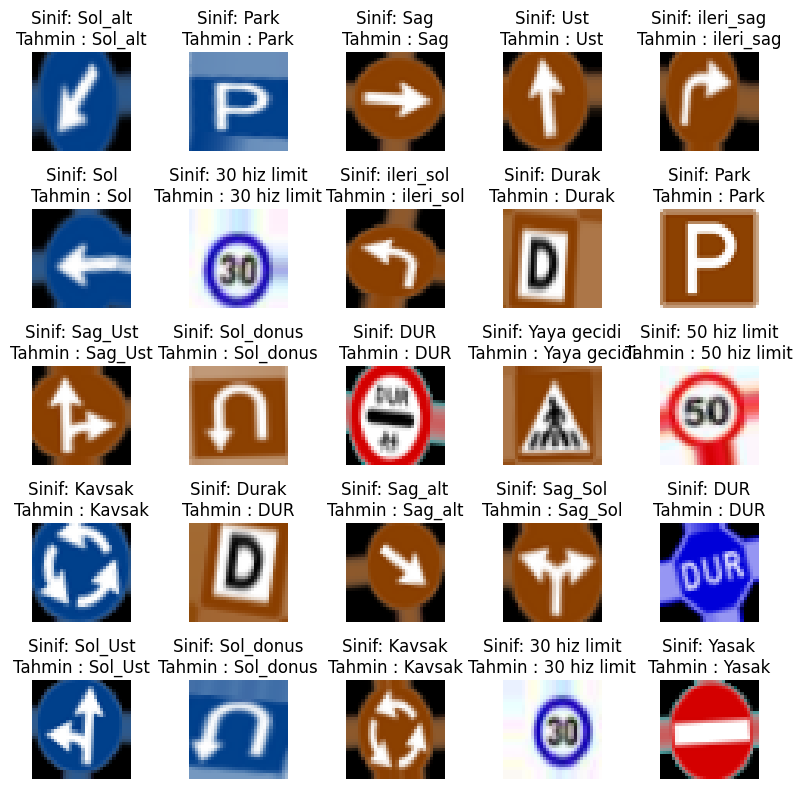

In [ ]:
y_pred = catb_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
i = 0
for ii in y_pred:
  y_pred[i] = ii[0]
  i += 1
show_images_with_predicted_values(images_3D_test, 25, y_pred)

Accuracy : 0.68


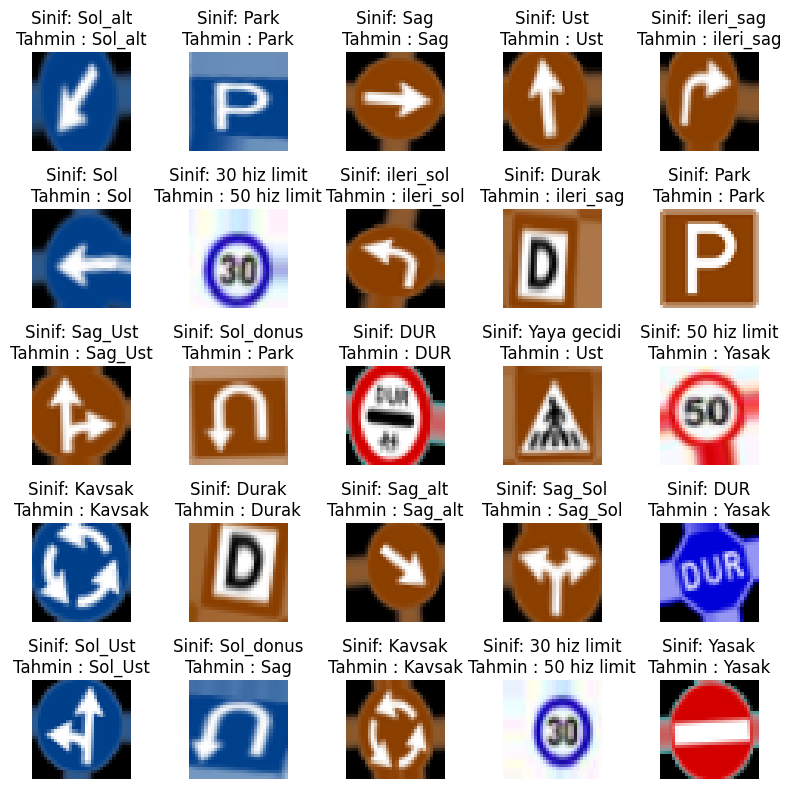

In [ ]:
y_pred = knn_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)

Accuracy : 0.88


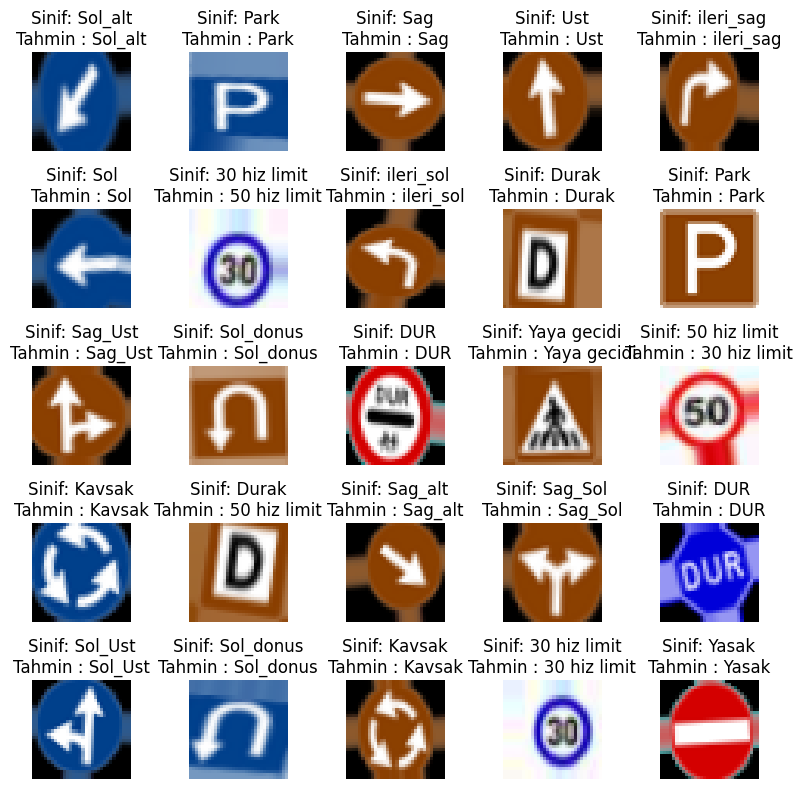

In [ ]:
y_pred = lgbm_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)

# **The models without extracting the features**

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9174418604651163

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9174418604651163

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8558139534883721

In [ ]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [ ]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9395348837209302

In [ ]:
mlpc_model = MLPClassifier().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5395348837209303

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.922093023255814

In [ ]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.6558139534883721

In [ ]:

# Assuming you have defined X_test and y_test somewhere in your code
modeller = [knn_model, mlpc_model, cart_model, rf_model, gbm_model, catb_model, lgbm_model]

# Initialize an empty list to store the results
results = []

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    results.append([isimler, dogruluk * 100])

# Convert the list of results to a pandas DataFrame
results_pd = pd.DataFrame(results, columns=["Modeller", "Accuracy"])

results_pd

,Modeller,Accuracy
0,KNeighborsClassifier,91.744186
1,MLPClassifier,53.953488
2,DecisionTreeClassifier,65.581395
3,RandomForestClassifier,91.744186
4,GradientBoostingClassifier,85.581395
5,CatBoostClassifier,93.953488
6,LGBMClassifier,92.209302


Text(0.5, 1.0, 'The accuracy of the models without Feature Extraction')

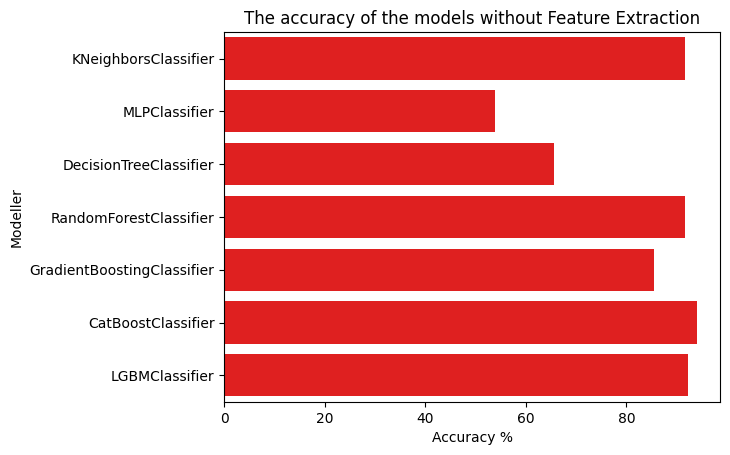

In [ ]:
sns.barplot(x="Accuracy", y= "Modeller", data=results_pd, color="r")
plt.xlabel("Accuracy %")
plt.title("The accuracy of the models without Feature Extraction")

In [ ]:
y_pred_catb = catb_model.predict(X_test)
accuracy_score(y_test, y_pred_catb)

0.9395348837209302

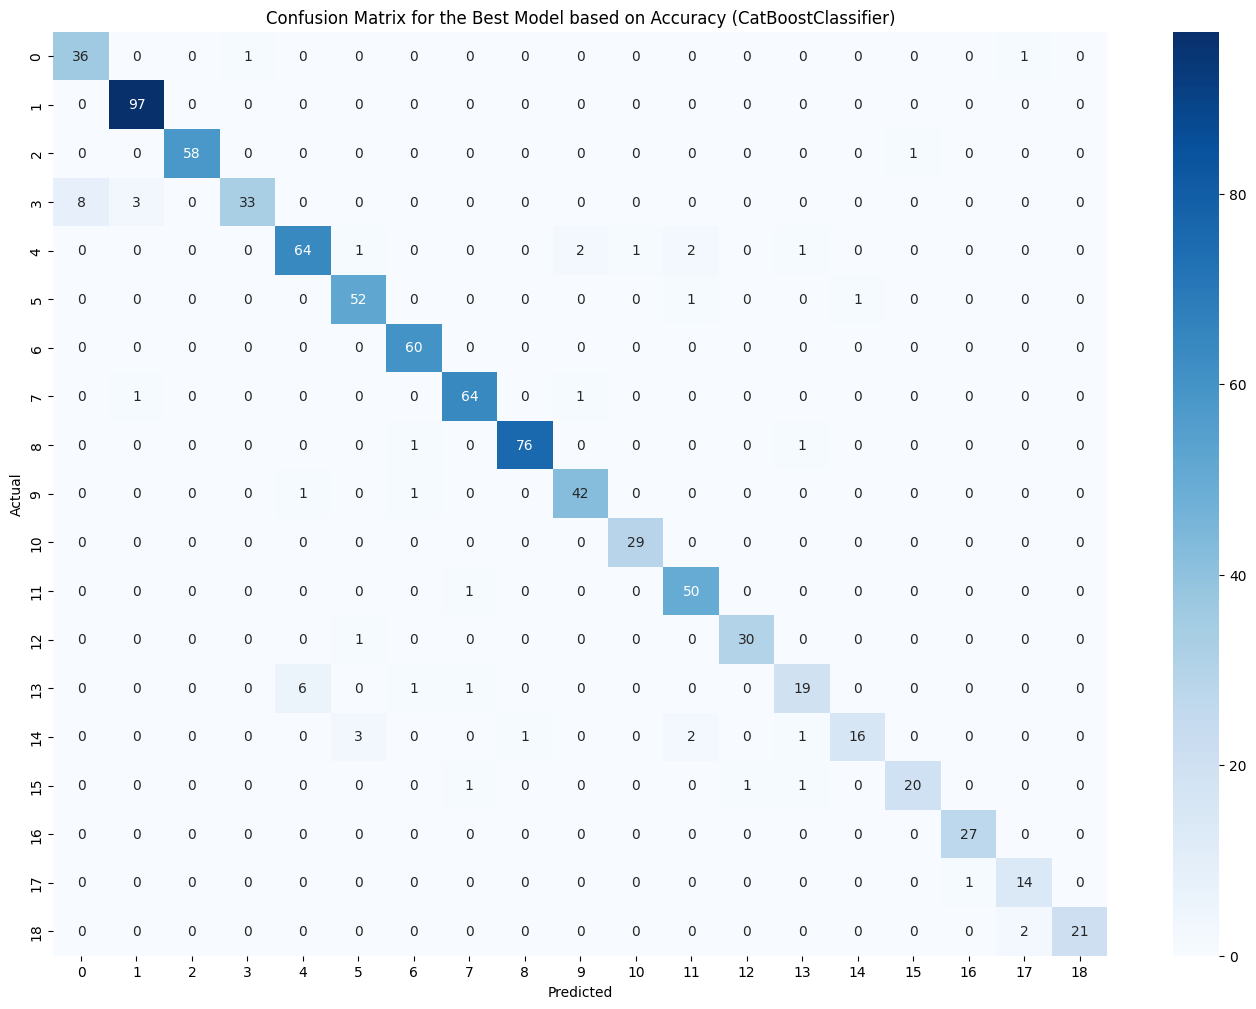

In [ ]:
# Calculate and display the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_catb)

plt.figure(figsize=(17, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title(f'Confusion Matrix for the Best Model based on Accuracy ({catb_model.__class__.__name__})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
images_2D_test_flattened = flatten(images_2D_test)

In [ ]:
images_2D_test_flattened = np.array(images_2D_test_flattened)

In [ ]:
images_2D_test_flattened.shape

(25, 1024)

Accuracy : 1.0


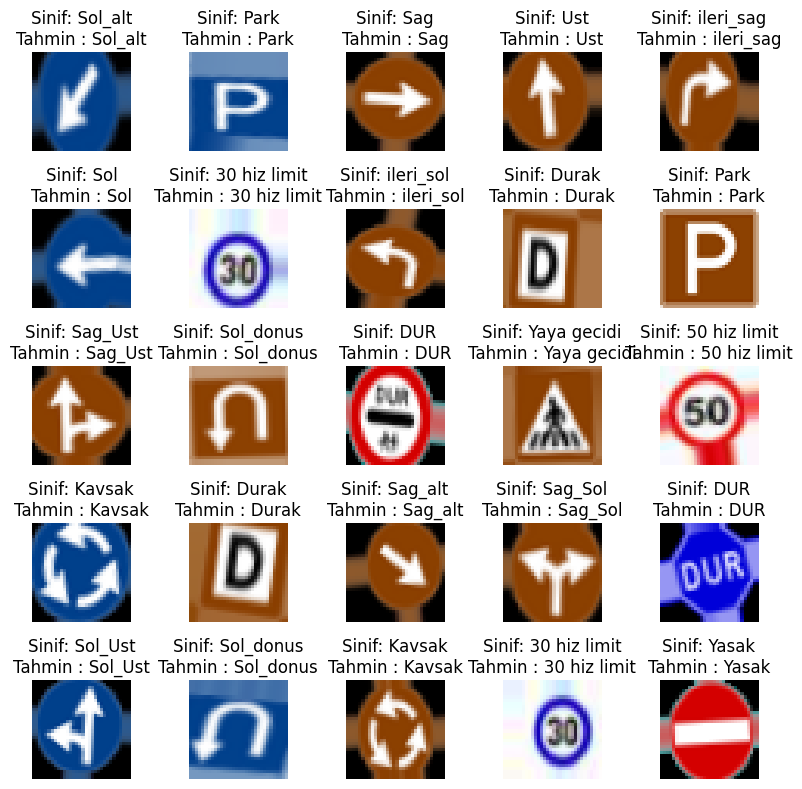

In [ ]:
y_pred = catb_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
i = 0
for ii in y_pred:
  y_pred[i] = ii[0]
  i += 1
show_images_with_predicted_values(images_3D_test, 25, y_pred)

Accuracy : 0.92


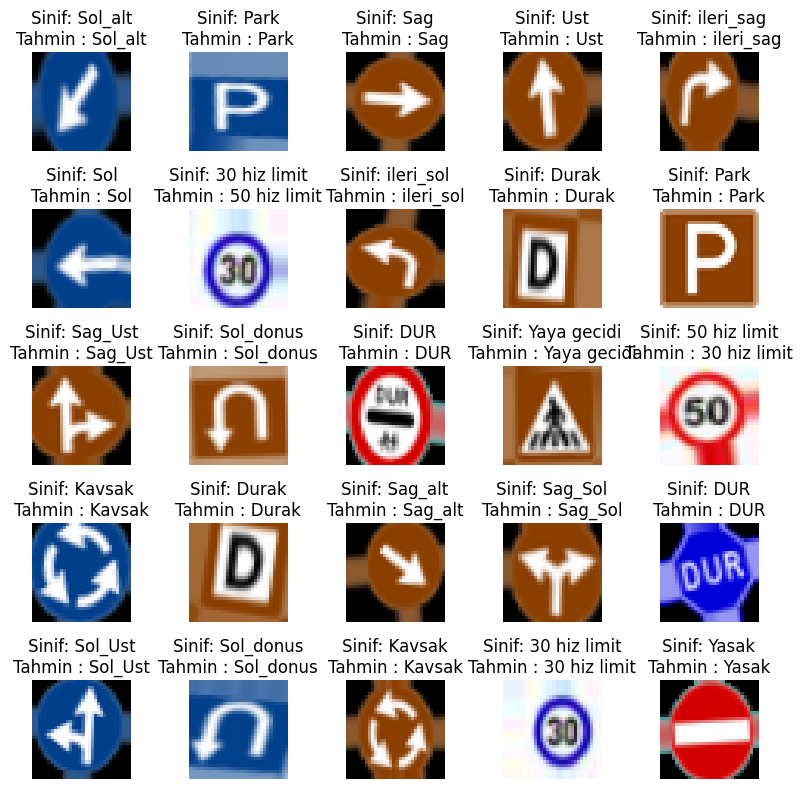

In [ ]:
y_pred = knn_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)

Accuracy : 0.96


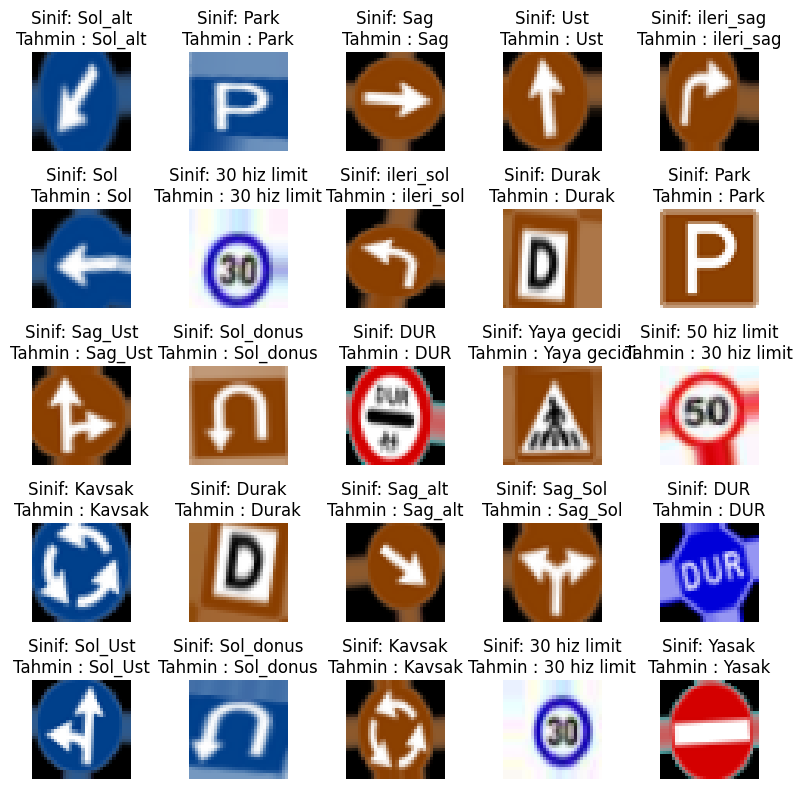

In [ ]:
y_pred = lgbm_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)

# **Model Tuning**

In [ ]:
knn_params = {
    "n_neighbors" : np.arange(1,15)
}
knn = KNeighborsClassifier()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
knn_cv_model.best_score_

0.949099938978914

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [ ]:
#final model
knn_tuned = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9418604651162791

Accuracy : 0.92


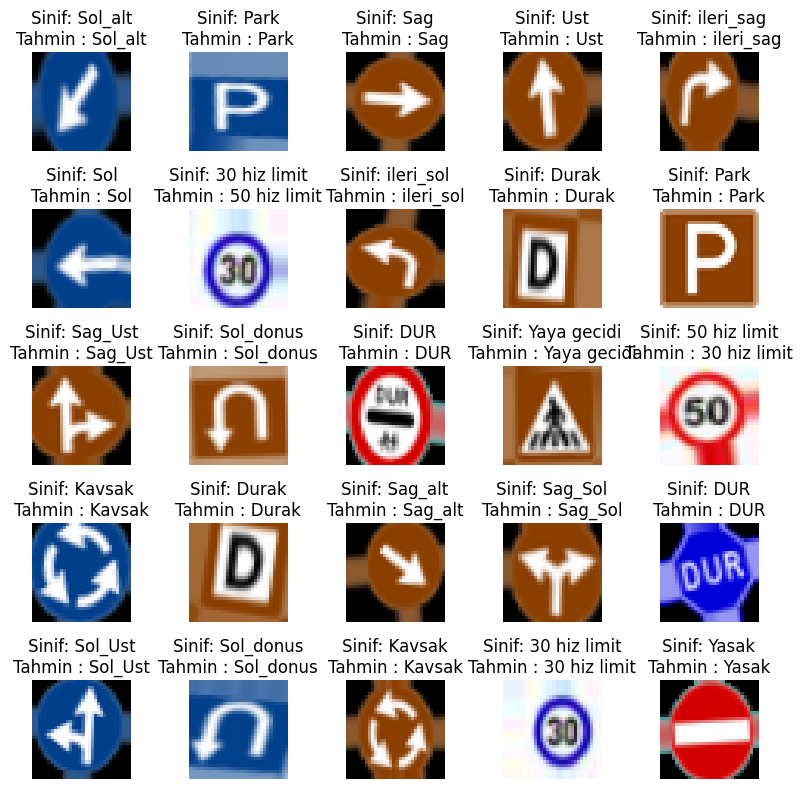

In [ ]:
y_pred = knn_model.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)

In [ ]:
catb_params = {
    "iterations" : [200,100],
    "learning_rate" : [0.03, 0.1],
    "depth" : [4,8]
}

In [ ]:
catb = CatBoostClassifier()

In [ ]:
from joblib import parallel_backend


# Use joblib for parallelization
with parallel_backend('multiprocessing', n_jobs=-1):
    catb_cv_model = GridSearchCV(catb, catb_params, cv=5, verbose=2, scoring='accuracy').fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
catb_tuend = CatBoostClassifier(
    depth=8,
    iterations=200,
    learning_rate=0.1
).fit(X_train, y_train)

In [ ]:
y_pred = catb_tuend.predict(X_test)
accuracy_score(y_test, y_pred)

0.9058139534883721

Accuracy : 0.96


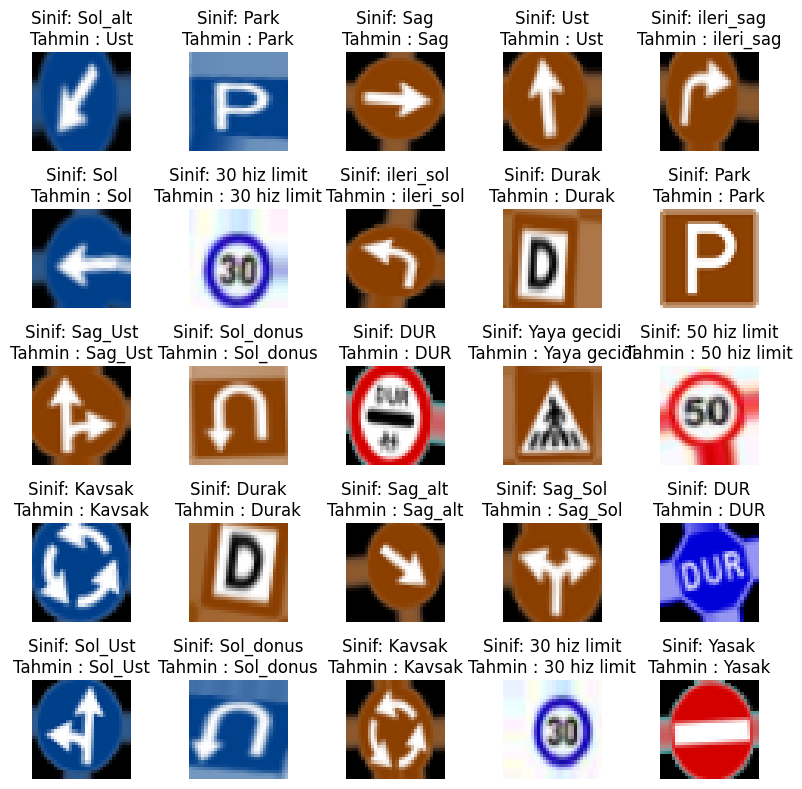

In [ ]:
y_pred = catb_tuend.predict(images_2D_test_flattened_featured)
print("Accuracy : " + str(accuracy_score(y_tt, y_pred)))
show_images_with_predicted_values(images_3D_test, 25, y_pred)